<div class="alert alert-block alert-info"> <b>Data Merging</b></div>

In [81]:
# Top 5 Countries: United States, China, Japan, Germany, India

In [82]:
import pandas as pd
import matplotlib.pyplot as plt 

debug=True

keep_countries = ["United States", "China", "Japan", "Germany", "India"]
keep_metrics = ["country", "year", "co2", "population", "gdp", "primary_energy_consumption"]

# Import main co2 dataset
co2 = pd.read_csv("data/owid-co2-data.csv")

co2 = co2[keep_metrics]

if debug:
    co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25204 entries, 0 to 25203
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     25204 non-null  object 
 1   year                        25204 non-null  int64  
 2   co2                         23949 non-null  float64
 3   population                  22878 non-null  float64
 4   gdp                         13538 non-null  float64
 5   primary_energy_consumption  8690 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.2+ MB


In [83]:
co2 = co2[co2["country"].isin(keep_countries)]

if debug:
    display(co2.sample(10))

,country,year,co2,population,gdp,primary_energy_consumption
9464,Germany,1894,229.498,5.082744e+07,2.058201e+11,NaN
10937,India,1980,291.992,6.989528e+08,1.015105e+12,1208.518
10849,India,1892,5.254,2.861676e+08,2.553405e+11,NaN
9465,Germany,1895,238.285,5.152279e+07,2.156040e+11,NaN
4684,China,1981,1476.488,1.014022e+09,1.949955e+12,4790.988
10837,India,1880,1.889,2.619089e+08,NaN,NaN
10864,India,1907,21.800,3.047169e+08,2.906651e+11,NaN
23891,United States,1844,9.307,1.969673e+07,6.868259e+10,NaN
9399,Germany,1829,3.631,2.770964e+07,NaN,NaN
11957,Japan,1941,154.605,7.321598e+07,3.690067e+11,NaN


In [84]:
#  Load Coal Production Dataset

coal = pd.read_csv("data/coal-production-by-region.csv")
coal = coal.drop(["Code"], axis=1)

if debug:
    coal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 1762 non-null   object 
 1   Year                   1762 non-null   int64  
 2   Coal Production - TWh  1762 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 41.4+ KB


In [85]:
coal = coal[coal["Entity"].isin(keep_countries)]
coal = coal.rename(columns={"Entity": "country", "Year": "year"})

if debug:
    display(coal.sample(10))

,country,year,Coal Production - TWh
505,Germany,2006,620.453517
682,Japan,1983,111.029005
482,Germany,1983,1642.870590
290,China,1991,6323.265889
636,India,2017,3329.752881
716,Japan,2017,9.411325
517,Germany,2018,439.407623
496,Germany,1997,824.191330
502,Germany,2003,672.200391
683,Japan,1984,108.360664


In [86]:
co2_coal = pd.merge(co2, coal, on=["country", "year"], how="outer")

if debug:
    co2_coal.info()
    display(co2_coal.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     888 non-null    object 
 1   year                        888 non-null    int64  
 2   co2                         875 non-null    float64
 3   population                  880 non-null    float64
 4   gdp                         724 non-null    float64
 5   primary_energy_consumption  275 non-null    float64
 6   Coal Production - TWh       200 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 55.5+ KB


,country,year,co2,population,gdp,primary_energy_consumption,Coal Production - TWh
27,China,1926,29.590,484486965.0,NaN,NaN,NaN
670,United States,1803,0.297,6347862.0,NaN,NaN,NaN
758,United States,1891,427.425,66079404.0,4.400794e+11,NaN,NaN
323,Germany,1993,956.132,80428557.0,2.210102e+12,3978.087,1021.692378
463,India,1970,181.899,555189797.0,7.487440e+11,758.209,NaN
23,China,1922,26.634,477678125.0,NaN,NaN,NaN
375,India,1882,2.199,265512544.0,NaN,NaN,NaN
139,Germany,1809,0.931,20831897.0,NaN,NaN,NaN
766,United States,1899,625.534,77231772.0,5.976605e+11,NaN,NaN
516,Japan,1870,0.018,34388672.0,5.441046e+10,NaN,NaN


In [87]:
# Load Oil Consumption

oil = pd.read_csv("data/oil-consumption-by-country.csv")
oil = oil.drop(["Code"], axis=1)

if debug:
    oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 5003 non-null   object 
 1   Year                   5003 non-null   int64  
 2   Oil Consumption - TWh  5003 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 117.4+ KB


In [88]:
oil = oil[oil["Entity"].isin(keep_countries)]
oil = oil.rename(columns={"Entity": "country", "Year": "year"})

if debug:
    display(oil.sample(10))

,country,year,Oil Consumption - TWh
4688,United States,1966,6731.245156
1605,Germany,1981,1601.384403
2261,Japan,1965,1013.770309
2271,Japan,1975,2827.112678
4689,United States,1967,6988.794081
4700,United States,1978,10501.413894
1630,Germany,2006,1457.237177
857,China,1972,519.696499
1895,India,1991,706.101091
1906,India,2002,1311.634285


In [89]:
co2_coal_oil = pd.merge(co2_coal, oil, on=["country", "year"], how="outer")

if debug:
    co2_coal_oil.info()
    display(co2_coal_oil.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     888 non-null    object 
 1   year                        888 non-null    int64  
 2   co2                         875 non-null    float64
 3   population                  880 non-null    float64
 4   gdp                         724 non-null    float64
 5   primary_energy_consumption  275 non-null    float64
 6   Coal Production - TWh       200 non-null    float64
 7   Oil Consumption - TWh       280 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 62.4+ KB


,country,year,co2,population,gdp,primary_energy_consumption,Coal Production - TWh,Oil Consumption - TWh
591,Japan,1945,76.635,77370299.0,2.803267e+11,NaN,NaN,NaN
487,India,1994,716.918,945601828.0,2.039525e+12,2739.064,1466.095144,808.266712
236,Germany,1906,361.937,60262412.0,2.988325e+11,NaN,NaN,NaN
135,Germany,1805,1.041,19522077.0,NaN,NaN,NaN,NaN
450,India,1957,91.739,425270709.0,4.433560e+11,NaN,NaN,NaN
463,India,1970,181.899,555189797.0,7.487440e+11,758.209,NaN,226.891447
5,China,1904,2.088,410667922.0,NaN,NaN,NaN,NaN
529,Japan,1883,2.711,37561179.0,NaN,NaN,NaN,NaN
748,United States,1881,210.193,52612396.0,3.268832e+11,NaN,NaN,NaN
626,Japan,1980,944.869,117816942.0,2.500144e+12,4244.663,NaN,2837.012719


In [90]:
# Load Coal Consumption Dataset

coal_cons = pd.read_csv('data/world-coal-consumption-1978-2020.csv')

# Comment out this line to include EU27 countries
coal_cons = coal_cons.drop(["EU27"], axis=1)
    
coal_cons = pd.melt(coal_cons, id_vars=["Year"], var_name="country", value_name="Coal Consumption - TWh")
coal_cons = coal_cons.rename(columns={"Year": "year"})

# Dataset gave values in Terajoules (supposedly??), converting to TWh
coal_cons["Coal Consumption - TWh"] = coal_cons["Coal Consumption - TWh"] / 3600

coal_cons.sample(10)

,year,country,Coal Consumption - TWh
92,1984,United States,4.765355
89,1981,United States,4.483806
48,1983,India,0.660213
42,2020,China,24.343903
98,1990,United States,5.343348
157,2006,Japan,1.298607
151,2000,Japan,1.132467
124,2016,United States,3.972015
24,2002,China,8.904888
46,1981,India,0.581201


In [91]:
merged = pd.merge(co2_coal_oil, coal_cons, on=["country", "year"], how="outer")

if debug:
    merged.info()
    display(merged.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     888 non-null    object 
 1   year                        888 non-null    int64  
 2   co2                         875 non-null    float64
 3   population                  880 non-null    float64
 4   gdp                         724 non-null    float64
 5   primary_energy_consumption  275 non-null    float64
 6   Coal Production - TWh       200 non-null    float64
 7   Oil Consumption - TWh       280 non-null    float64
 8   Coal Consumption - TWh      172 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 69.4+ KB


,country,year,co2,population,gdp,primary_energy_consumption,Coal Production - TWh,Oil Consumption - TWh,Coal Consumption - TWh
609,Japan,1963,324.835,9.638942e+07,7.915344e+11,NaN,NaN,NaN,NaN
164,Germany,1834,4.411,2.924218e+07,NaN,NaN,NaN,NaN,NaN
532,Japan,1886,3.605,3.851393e+07,7.075095e+10,NaN,NaN,NaN,NaN
254,Germany,1924,451.793,6.369037e+07,3.196920e+11,NaN,NaN,NaN,NaN
493,India,2000,978.919,1.056576e+09,2.773211e+12,3705.991,1771.191769,1281.237220,1.678173
567,Japan,1921,66.809,5.602745e+07,1.832735e+11,NaN,NaN,NaN,NaN
638,Japan,1992,1179.396,1.253313e+08,3.855720e+12,5361.678,49.461925,3063.815872,0.909049
736,United States,1869,93.696,3.977694e+07,1.946853e+11,NaN,NaN,NaN,NaN
476,India,1983,352.530,7.494290e+08,1.202349e+12,1396.258,776.837023,444.352945,0.660213
403,India,1910,23.517,3.097728e+08,3.356331e+11,NaN,NaN,NaN,NaN


In [92]:
# Load Coal Consumption Dataset

cars = pd.read_csv('data/car_production.csv')

cars = pd.melt(cars, id_vars=["country"], var_name="year", value_name="Cars Produced - Thousands")
cars["year"] = pd.to_numeric(cars["year"])  

if debug:
    cars.info()
    display(cars.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   country                    155 non-null    object
 1   year                       155 non-null    int64 
 2   Cars Produced - Thousands  155 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.8+ KB


,country,year,Cars Produced - Thousands
106,Germany,2011,6311.318
31,Germany,1996,4843.0
55,China,2001,2331.776
105,China,2011,18418.876
68,Japan,2003,10286.318
37,India,1997,746.0
119,United States,2013,11066.432
0,China,1961,U
81,Germany,2006,5819.614
3,Japan,1961,1039


In [93]:
final = pd.merge(merged, cars, on=["country", "year"], how="outer")

if debug:
    final.info()
    display(final.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     888 non-null    object 
 1   year                        888 non-null    int64  
 2   co2                         875 non-null    float64
 3   population                  880 non-null    float64
 4   gdp                         724 non-null    float64
 5   primary_energy_consumption  275 non-null    float64
 6   Coal Production - TWh       200 non-null    float64
 7   Oil Consumption - TWh       280 non-null    float64
 8   Coal Consumption - TWh      172 non-null    float64
 9   Cars Produced - Thousands   155 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 76.3+ KB


,country,year,co2,population,gdp,primary_energy_consumption,Coal Production - TWh,Oil Consumption - TWh,Coal Consumption - TWh,Cars Produced - Thousands
46,China,1945,50.347,5.352223e+08,NaN,NaN,NaN,NaN,NaN,NaN
702,United States,1835,4.316,1.520895e+07,5.243762e+10,NaN,NaN,NaN,NaN,NaN
114,China,2013,9952.744,1.391883e+09,1.530443e+13,33715.209,22034.135553,5982.918831,23.743987,22116.825
334,Germany,2004,887.089,8.164647e+07,2.929754e+12,3983.189,679.344676,1490.490135,NaN,5569.954
796,United States,1929,1963.414,1.266543e+08,1.461345e+12,NaN,NaN,NaN,NaN,NaN
152,Germany,1822,3.631,2.550713e+07,NaN,NaN,NaN,NaN,NaN,NaN
166,Germany,1836,5.192,2.985818e+07,NaN,NaN,NaN,NaN,NaN,NaN
792,United States,1925,1758.098,1.196612e+08,1.296540e+12,NaN,NaN,NaN,NaN,NaN
192,Germany,1862,45.540,3.678754e+07,9.645814e+10,NaN,NaN,NaN,NaN,NaN
234,Germany,1904,356.122,5.850649e+07,2.840587e+11,NaN,NaN,NaN,NaN,NaN


In [94]:
# Export

final.to_csv('dataset.csv', index=False) 

<div class="alert alert-block alert-info"> <b>Data Preparation</b></div>

In [95]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     888 non-null    object 
 1   year                        888 non-null    int64  
 2   co2                         875 non-null    float64
 3   population                  880 non-null    float64
 4   gdp                         724 non-null    float64
 5   primary_energy_consumption  275 non-null    float64
 6   Coal Production - TWh       200 non-null    float64
 7   Oil Consumption - TWh       280 non-null    float64
 8   Coal Consumption - TWh      172 non-null    float64
 9   Cars Produced - Thousands   155 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 76.3+ KB


In [96]:
final.isna().sum()

country                         0
year                            0
co2                            13
population                      8
gdp                           164
primary_energy_consumption    613
Coal Production - TWh         688
Oil Consumption - TWh         608
Coal Consumption - TWh        716
Cars Produced - Thousands     733
dtype: int64

Temporarily dropping everything before 1970...

In [97]:
recents_1970 = final[final["year"] > 1970]

recents_1970.info()
recents_1970.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 72 to 887
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     250 non-null    object 
 1   year                        250 non-null    int64  
 2   co2                         250 non-null    float64
 3   population                  250 non-null    float64
 4   gdp                         240 non-null    float64
 5   primary_energy_consumption  245 non-null    float64
 6   Coal Production - TWh       200 non-null    float64
 7   Oil Consumption - TWh       250 non-null    float64
 8   Coal Consumption - TWh      172 non-null    float64
 9   Cars Produced - Thousands   150 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 21.5+ KB


country                         0
year                            0
co2                             0
population                      0
gdp                            10
primary_energy_consumption      5
Coal Production - TWh          50
Oil Consumption - TWh           0
Coal Consumption - TWh         78
Cars Produced - Thousands     100
dtype: int64

Not bad, 1980?

In [98]:
recents_1980 = final[final["year"] > 1980]

recents_1980.info()
recents_1980.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 82 to 887
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     200 non-null    object 
 1   year                        200 non-null    int64  
 2   co2                         200 non-null    float64
 3   population                  200 non-null    float64
 4   gdp                         190 non-null    float64
 5   primary_energy_consumption  195 non-null    float64
 6   Coal Production - TWh       200 non-null    float64
 7   Oil Consumption - TWh       200 non-null    float64
 8   Coal Consumption - TWh      160 non-null    float64
 9   Cars Produced - Thousands   145 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 17.2+ KB


country                        0
year                           0
co2                            0
population                     0
gdp                           10
primary_energy_consumption     5
Coal Production - TWh          0
Oil Consumption - TWh          0
Coal Consumption - TWh        40
Cars Produced - Thousands     55
dtype: int64

Only marginally better.

In [108]:
recents = recents_1970
recents.describe()

,year,co2,population,gdp,primary_energy_consumption,Coal Production - TWh,Oil Consumption - TWh,Coal Consumption - TWh
count,250.000000,250.000000,2.500000e+02,2.400000e+02,245.000000,200.000000,250.000000,172.000000
mean,1995.500000,2558.821852,5.298268e+08,5.300036e+12,10224.471171,4147.882140,3627.400044,5.035815
std,14.459818,2452.135380,4.865564e+08,4.477200e+12,9555.981856,5364.788045,3347.462415,5.743050
min,1971.000000,192.145000,7.768229e+07,7.535430e+11,788.346000,4.893107,243.332463,0.444705
25%,1983.000000,918.326000,1.206180e+08,2.092128e+12,3953.765000,542.562560,1340.671475,1.280155
50%,1995.500000,1235.967000,2.667494e+08,3.704596e+12,5268.915000,1782.474436,2235.863422,3.839166
75%,2008.000000,4565.846750,1.010742e+09,6.746092e+12,19271.578000,6062.563019,4447.108320,5.834072
max,2020.000000,10667.887000,1.439324e+09,1.815162e+13,39360.925000,22475.080114,11214.078236,24.343903


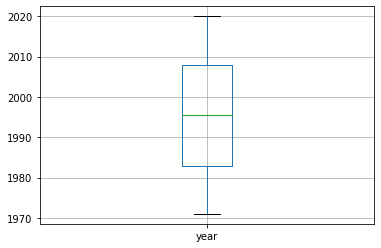

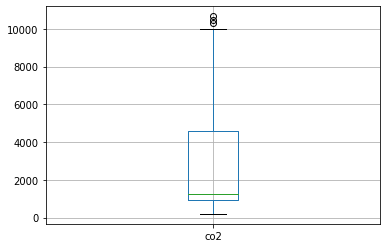

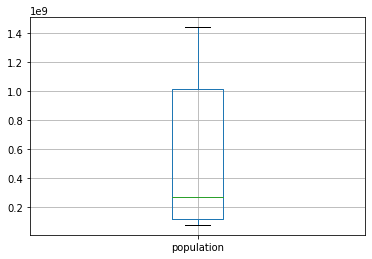

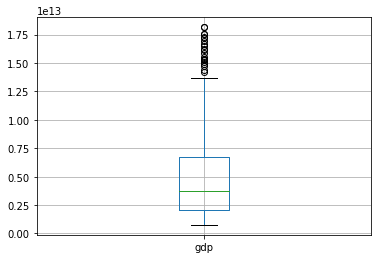

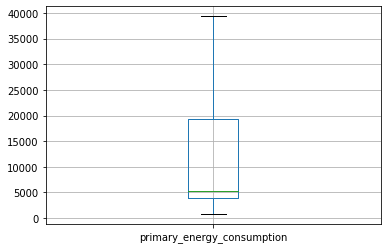

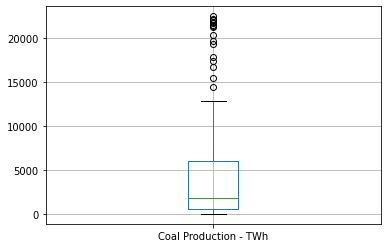

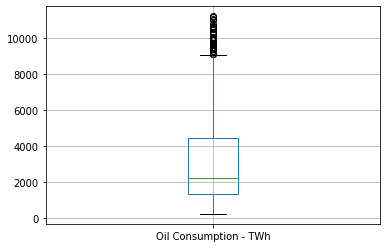

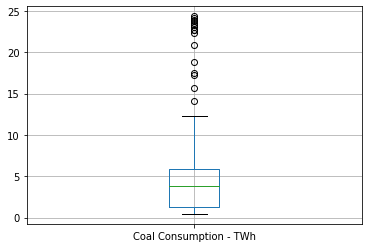

In [109]:
plot_em = recents.select_dtypes(exclude=['object'])

for col in plot_em:
    plt.figure()
    plot_em.boxplot([col], figsize=(12,8))

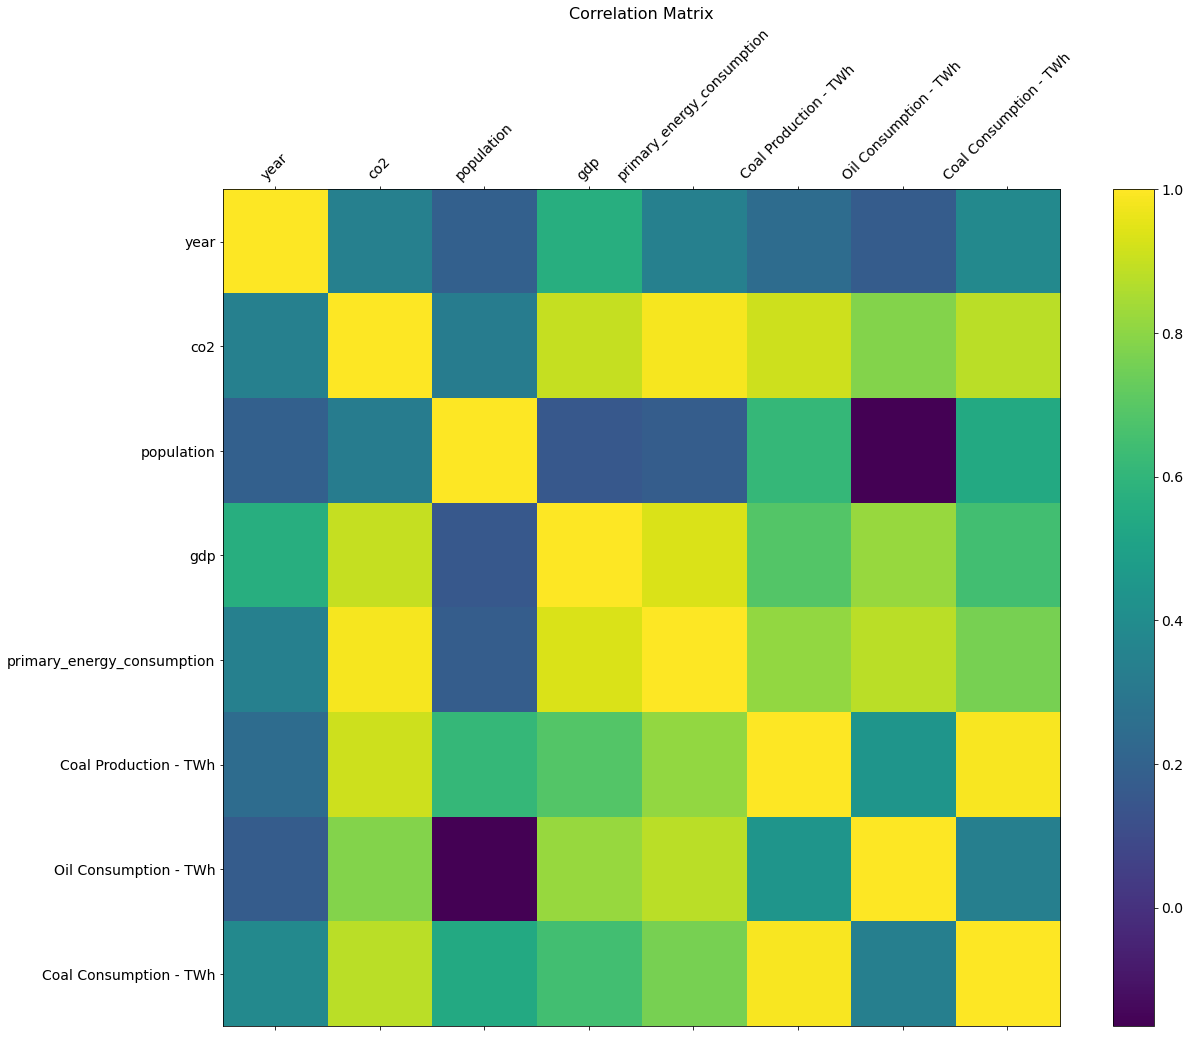

In [112]:
f = plt.figure(figsize=(19, 15))
plt.matshow(plot_em.corr(), fignum=f.number)
plt.xticks(range(plot_em.select_dtypes(['number']).shape[1]), plot_em.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(plot_em.select_dtypes(['number']).shape[1]), plot_em.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [114]:
cm = plot_em.corr()
cm

,year,co2,population,gdp,primary_energy_consumption,Coal Production - TWh,Oil Consumption - TWh,Coal Consumption - TWh
year,1.000000,0.341208,0.192360,0.563323,0.339978,0.245464,0.173053,0.381581
co2,0.341208,1.000000,0.325034,0.899651,0.982028,0.910758,0.781909,0.879128
population,0.192360,0.325034,1.000000,0.156291,0.179982,0.611162,-0.165314,0.542687
gdp,0.563323,0.899651,0.156291,1.000000,0.934327,0.686679,0.819447,0.648436
primary_energy_consumption,0.339978,0.982028,0.179982,0.934327,1.000000,0.811826,0.879719,0.760407
Coal Production - TWh,0.245464,0.910758,0.611162,0.686679,0.811826,1.000000,0.444568,0.990443
Oil Consumption - TWh,0.173053,0.781909,-0.165314,0.819447,0.879719,0.444568,1.000000,0.336583
Coal Consumption - TWh,0.381581,0.879128,0.542687,0.648436,0.760407,0.990443,0.336583,1.000000
